In [1390]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import *
from scipy import ndimage
from numpy.linalg import inv
import random
np.random.seed()

def showit(data,name):
    data = data[::-1,::]
    colors = [(0,0,i/1000.,.9) for i in xrange(1,1000)]
    new_map = matplotlib.colors.LinearSegmentedColormap.from_list('new_map', colors, N=256)
    pcolor(data, cmap=new_map)
    colorbar()
    print name
    show()

def showimg(data,name):
    print name
    testplot = plt.imshow(data)
    colorbar()
    show()

# make grayscale from rgb
def make_grayscale(input):
    size = len(input)
    output = np.zeros((size,size,3))
    for x in range(len(a)):
        for y in range(len(a)):
            r = input[x][y][0]
            g = input[x][y][1]
            b = input[x][y][2]
            output[x][y] = (max(r, g, b) + min(r, g, b)) / 2.
    return output

# print special x [:,:,2] format
def myprint(x,title=False):
    if title:
        print title,'\n'
    for a in range(x.shape[2]):
        print title,"[:,:,%d]" % a
        print x[:,:,a],'\n'


# zero pad an input
def zero_pad(x,p=1):
    xy = len(x)
    dim = len(x.shape)    
    output = np.zeros((xy+2*p,xy+2*p,x.shape[2]))
    output[p:p+xy,p:p+xy,:] += x[:,:,:]
    return output            
        

# convolution function
def convolve(x, k, bias=[0], p=1, s=1):
    if len(k.shape)==3:
        k = np.array([k])
    # hyperparameters
    f = len(k[0])
    n = (len(x) - f + 2*p)/s + 1
    o = np.zeros((n,n,len(k)))  # turn 1 into parameter
    t = np.arange(0,n)*s
    
    # pad
    x = zero_pad(x)

    # convolve
    for d in range(len(k)):
        for a in t:
            for b in t:
                o[a,b,d] = np.sum( x[a:a+f,b:b+f,:] * k[d]) + bias[d]
    return np.maximum(o,0)

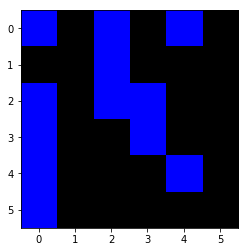

kernel[0,:,:,2]


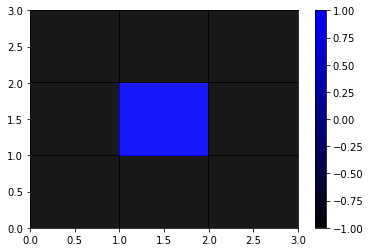

kernel[1,:,:,2]


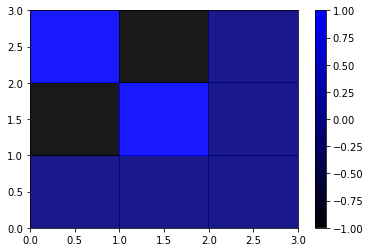

l1[:,:,0]


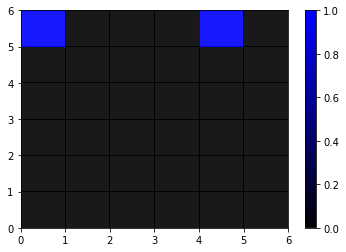

l1[:,:,1]


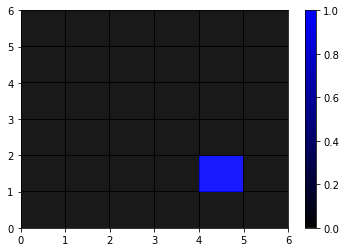

In [1391]:
l0 = np.round(np.random.random(((6,6,3)))*(.7))
l0[:,:,0:2]=0
b0 = [0,-1]
kernel = np.zeros((2,3,3,3))
kernel[0,:,:,2]=-1
kernel[0,1,1,2]=1
kernel[1,0,:,2]=[1,-1,0]
kernel[1,1,:,2]=[-1,1,0]

l1 = convolve(l0,kernel,b0)

imgplot = plt.imshow(l0)
show()

showit(kernel[0,:,:,2],'kernel[0,:,:,2]')
showit(kernel[1,:,:,2],'kernel[1,:,:,2]')

showit(l1[:,:,0],'l1[:,:,0]')
showit(l1[:,:,1],'l1[:,:,1]')

l0
[[ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.]]
kernel
[[-1 -1 -1]
 [-1  1 -1]
 [-1 -1 -1]]
l1
[[ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]] 

l0


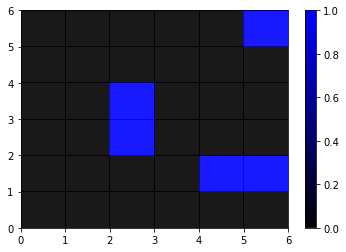

kernel


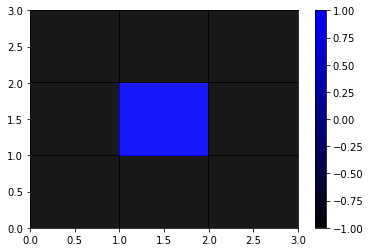

l1


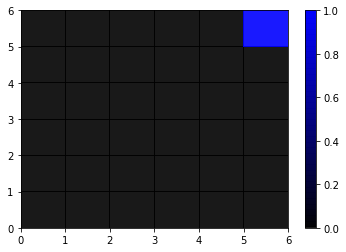

In [1340]:
# zero pad an input
def zero_pad_2d(x,p=1):
    xy = len(x)
    dim = len(x.shape)
    output = np.zeros((xy+2*p,xy+2*p))
    output[p:p+xy,p:p+xy] += x[:,:]
    return output    

# Convolve 2d
def convolve_2d(x, k, b0=0,p=1,s=1):
    # hyperparameters
    n = (len(x) - len(k) + 2*p)/s + 1
    t = np.arange(0,n)*s
    o = np.zeros((n,n))
    
    # pad   
    x = zero_pad_2d(x,p)

    # convolve
    for a in t:
        for b in t:
            o[a,b] = np.sum( x[a:a+len(k),b:b+len(k)] * k) + b0
    return np.maximum(o,0)


l0 = np.round(np.random.random(((6,6)))*(.6))
kernel = np.array([[-1,-1,-1],[-1,1,-1],[-1,-1,-1]])
l1 = convolve_2d(l0,kernel)

print 'l0\n',l0
print 'kernel\n',kernel
print 'l1\n',l1,'\n'
showit(l0,'l0')
showit(kernel.T[::-1],'kernel')
showit(l1,'l1')

(10, 10, 3)
(3, 3, 3)


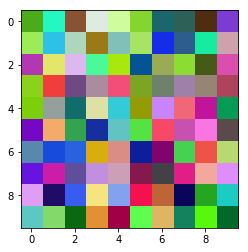

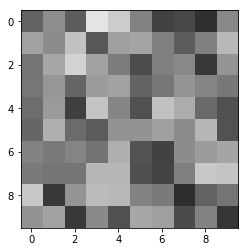

In [1146]:
# Create random n,n,3 array in rgb form

a = np.random.random((10,10,3))**.9
#a = np.zeros((8,8,3))
b = np.array([[[1]*3]*3]*3)
print a.shape
print b.shape

# show 3d rgb image
imgplot = plt.imshow(a)
show()

gray = make_grayscale(a)
imgplot = plt.imshow(gray)
show()
            